# Lecture 4 : Data visualization with Python

*November, 2021 - updated on April, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

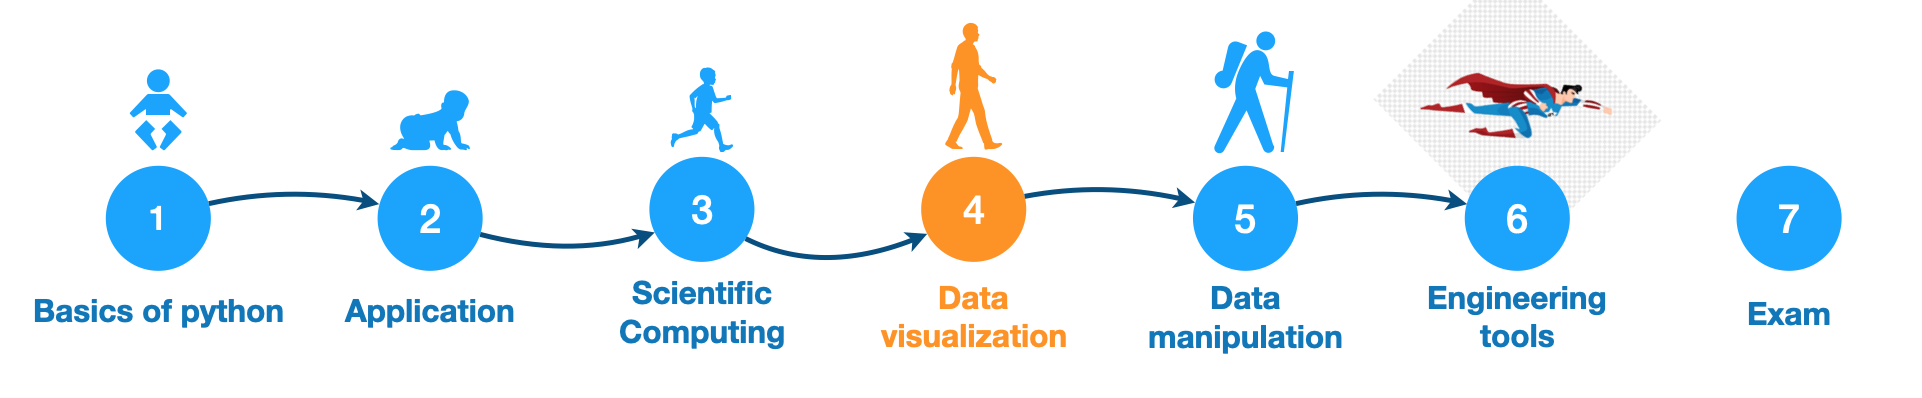

# Table of contents

[Introduction to Matplotlib](#I)

1. [Pyplot interface](#1)
2. [Line plot](#2)
3. [Scatter plot](#3)
4. [Histogram](#4)
5. [Global customization](#5)
6. [Subplots](#6)



7. [Object-oriented interface](#7)
8. [[optional] Other plots: a quick overview](#8)

[Exercices](#E)

# Introduction to Matplotlib <a name="I"></a>

Data visualization (or DataViz) is a process that allows you to understand data (e.g. patterns, trends or correlations) by representing it in a graphic form. For that purpose, there are many python packages available: in this notebook, we will visualize data thanks to [Matplotlib](http://matplotlib.org/contents.html) which is the most used Python package for plotting.

[Matplotlib](http://matplotlib.org/contents.html) is quite popular in Python thanks to its low-level coding which offers lots of freedom. Note that many "advanced" data visualization packages are built on top of Matplotlib. For instance:
- [Seaborn](https://seaborn.pydata.org/) for statistical data visualization (see next lecture)
- the plotting methods in [Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) (see the next lecture)
- [Plotly](https://plotly.com/) for creating interactive plots

## 1. Pyplot interface <a name="1"></a>

**Pyplot** is a submodule of matplotlib where it contains a collection of functions enables you to create or modify figures. Pyplot is very good for creating basic graphs like line charts, bar charts, histograms and many more. All the pyplot commands make changes and modify the same figure so that the state (i.e., the figure) is preserved through various function calls (i.e., the methods that modify the figure).

- We will see how the **pyplot interface** works in [section 3](#3), [4](#4), [5](#5) and [6](#6). 

- In [section 7](#7) (and [section 8](#8)) we will see another interface: the **object-oriented interface**. This interface is generally more flexible than the pyplot interface.

As usual, one can install the package Matplotlib with the command
```
pip install matplotlib
```
in anaconda prompt. After installing the package matplotlib one can import it alongside with the submodule `pyplot` and then rename it `plt` (frequently used) with the command:

In [1]:
import matplotlib.pyplot as plt

In a notebook, the code command `%matplotlib` configures the package that you will use to draw a figure. It performs a number of processes to prepare the display of the figure. It is recommended here to used it with the argument `inline`, which indicates that the package is integrated in Notebook. This directive must be included at the very beginning of your script, even before the package import directives.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt    # for plotting 
import numpy as np                 # for array

## 2. Line plot <a name="2"></a>

A line plot is a graph that uses lines to connect individual data points. A line plot displays quantitative values over a specified interval. This is particularly useful to visualize a (mathematical) function (e.g. sine, cosine, exponential or our own function). Let us plot a sine curve. For that purpose we will use one of the most popular function in `matplotlib.pyplot`: `plot` (see documentation for more information)

### Toy example

In [3]:
# our toy example
x = np.arange(0, 2*np.pi, 0.1)  # define the horizontal axis (or x axis)
y1 = np.sin(x)                  # define the vertical axis (or y axis)
y2 = np.cos(x)                  # define the vertical axis (or y axis)

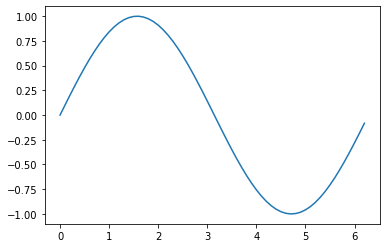

In [4]:
plt.plot(x, y1);                # plot the sine curve. The chosen interval is [0, 2 pi). `;`
# plt.show()                    # this line is used in IDEs for showing the plot. We don't need it in notebooks

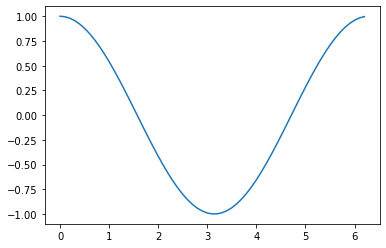

In [5]:
plt.plot(x, y2);                # plot the cosine curve. The chosen interval of analysis is [0, 2 pi)
# plt.show()                    # this line is used in IDEs for showing the plot. We don't need it in notebooks

At the end of the last line, we add `;` in order to prevent returning additional output.

### Simple customization

We can customize (non-exhaustive, see documentation for more details):
- the color of the line;
- the "alpha" (degree of transparency) of the line;
- the style of the line and its width.

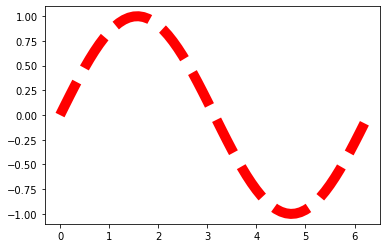

In [6]:
# changing linestyle, color and linewidth
plt.plot(x, y1, linestyle='dashed', color="red", linewidth=10);

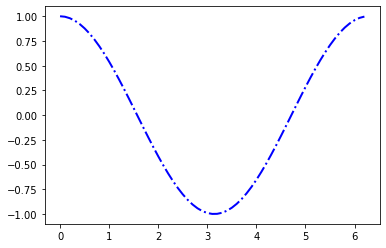

In [7]:
# changing linestyle, color and linewidth
plt.plot(x, y2, linestyle='dashdot', color='blue', linewidth=2);

## 3. Scatter plot <a name="3"></a>

Instead of curves, we want to create a **scatter plot**, a graph in which the values of two variables are plotted along two axes

### Toy example

Let us first generate random points in the space $[0,1] \times [0,1]$

In [8]:
# generating random points in the space [0, 1] x [0, 1]
import numpy as np

n = 50
x_scatter = np.random.rand(n)
y_scatter = np.random.rand(n)

In Matplotlib we can use the `scatter` method for creating a scatter plot

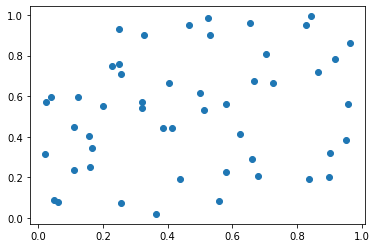

In [9]:
plt.scatter(x_scatter, y_scatter);

### Simple customization

The scatter plot can be customized. For instance we can customize (non-exhaustive, see documentation for more details):
- the color of the points;
- the "alpha" (degree of transparency) of the points;
- the marker style and its size.

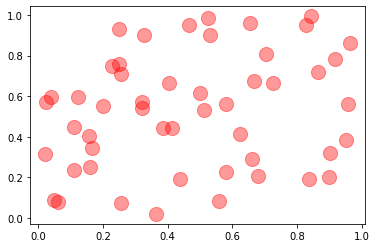

In [10]:
plt.scatter(x_scatter, y_scatter, c="red", alpha=0.4, marker="o", s=200);

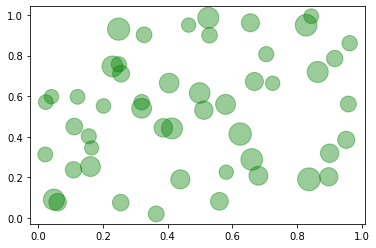

In [11]:
size = np.random.rand(n)
size = np.exp(size) * 200
plt.scatter(x_scatter, y_scatter, c="green", alpha=0.4, marker="o", s=size);

## 4. Histogram <a name="4"></a>
 
A **histogram** is a graphical display of numerical data by showing the number of data points that fall within a specified range of values (called "bins").

In Matplotlib we can create a Histogram using the `hist` method

### Toy example

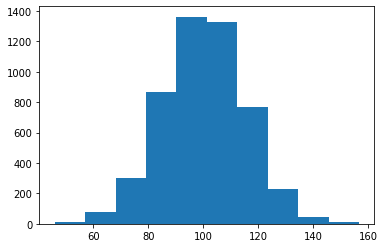

In [12]:
import numpy as np

n = 5000                                 # number of points
mu = 100                                 # mean of distribution
sigma = 15                               # standard deviation of distribution
sample = mu + sigma * np.random.randn(n) # we just have some random points around mu=100 and with a deviation of sigma = 15

plt.hist(sample);

### Simple customization

For histograms, we can customize (non-exhaustive, see documentation for more details):
- the number of equal-width bins;
- the "alpha" (degree of transparency) of the bars;
- the color of the bars.

We can also let the method `hist` to return a probability density instead of the raw count with the argument `density=True`

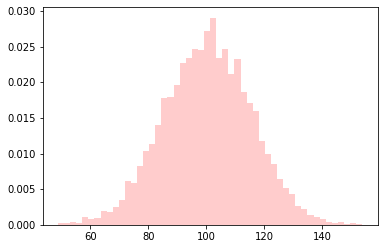

In [13]:
import numpy as np

n = 5000
mu = 100
sigma = 15
sample = mu + sigma * np.random.randn(n)

num_bins = 50
plt.hist(sample, num_bins, density=True, facecolor='red', alpha=0.2);

## 5. Global customization <a name="5"></a>

More generally, every figure can be customized. In a nutshell one can customize (non exhaustive):
- axes labels and title;
- legend;
- additional information (e.g. texts, arrows, another curve, ...);
- overall look of your matplotlib plot (e.g. size of the figure, having subfigures, ...).

In pyplot, the methods for drawing a graph or editing a label apply by default to the last current state (last instance of a subplot or last instance of an axis for example). As a consequence, you must design your codes as a sequence of instructions (for example, you must not separate instructions that refer to the same graph in two different Notebook cells).

**Remark:** here, let us use the sine and cosine plot of the section 2 as a toy example.

### Adding axes and title

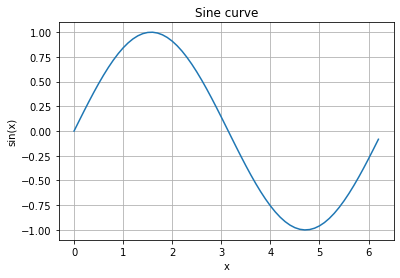

In [14]:
plt.plot(x, y1)
plt.grid()
plt.xlabel("x")           # horizontal label
plt.ylabel("sin(x)")      # vertical label
plt.title("Sine curve");  # title of the figure

### Adding another line

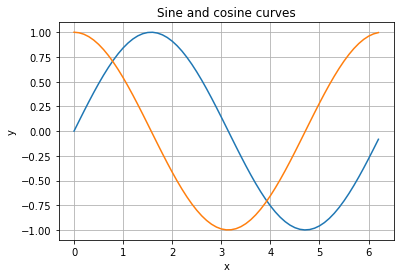

In [15]:
plt.plot(x, y1)
plt.plot(x, y2)  # adding cosine curve
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves");

### Adding a legend

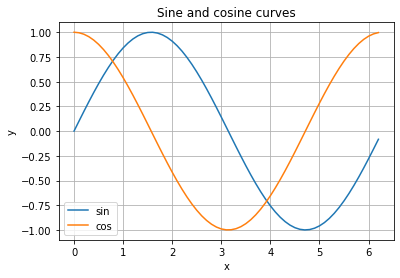

In [16]:
# adding a legend thx to the argument `label` of plot and the function `legend` of pyplot

plt.plot(x, y1, label="sin")       # adding a label for the legend
plt.plot(x, y2, label="cos")       # adding a label for the legend
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves")
plt.legend();                      # adding legend

### Customize the figure size

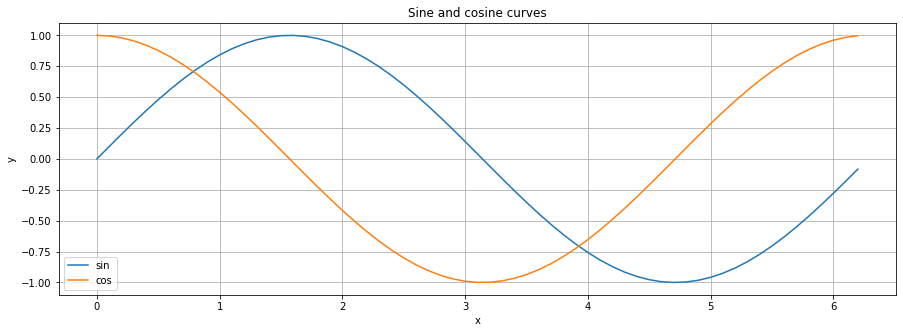

In [17]:
# choosing the size of the figure

plt.figure(figsize=(15, 5))        # where figsize sets width x height in inches
plt.plot(x, y1, label="sin")
plt.plot(x, y2, label="cos")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves")
plt.legend();

### Customize the Axes

- fill between curves

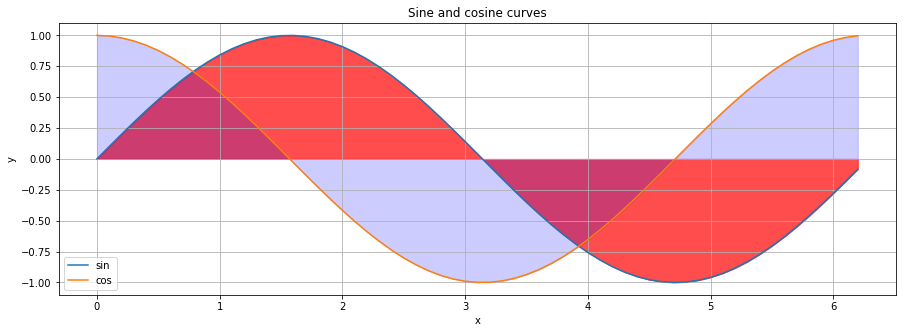

In [18]:
# fill between curves

plt.figure(figsize=(15, 5))
plt.plot(x, y1, label="sin")
plt.plot(x, y2, label="cos")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves")
plt.legend();

# in the interval x, fill with red color the space between 0 and y1 with a 0.7 "transparency degree"
plt.fill_between(x, 0, y1, color="red", alpha=0.7)

# in the interval x, fill with blue color the space between 0 and y2 with a 0.2 "transparency degree"
plt.fill_between(x, 0, y2, color="blue", alpha=0.2);

- set the limits of both x-axis and y-axis

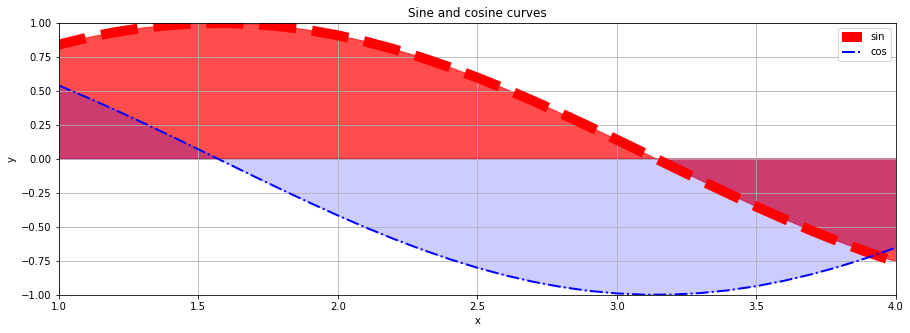

In [19]:
# set the limits

plt.figure(figsize=(15, 5))
plt.plot(x, y1, label="sin", linestyle='dashed', color="red", linewidth=10)
plt.plot(x, y2, label="cos", linestyle='dashdot', color='blue', linewidth=2)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves")
plt.legend();
plt.fill_between(x, 0, y1, color="red", alpha=0.7)
plt.fill_between(x, 0, y2, color="blue", alpha=0.2)
plt.xlim(1, 4)
plt.ylim(-1, 1);

## 6. Subplots <a name="6"></a>

Let us clarify the differences between several terms that will be used later. We call:

- **figure**, the final image that may include one or several axes;
- an **Axes**, a particular "cell" of the figure which contains one plot (including graphs, x-axis, y-axis, title, ...). We can also call it a *subfigure*;
- **subplots**, a group of Axes contained in a figure. Therefore leading to a multiple plots coexisting "side-by-side" in a figure.

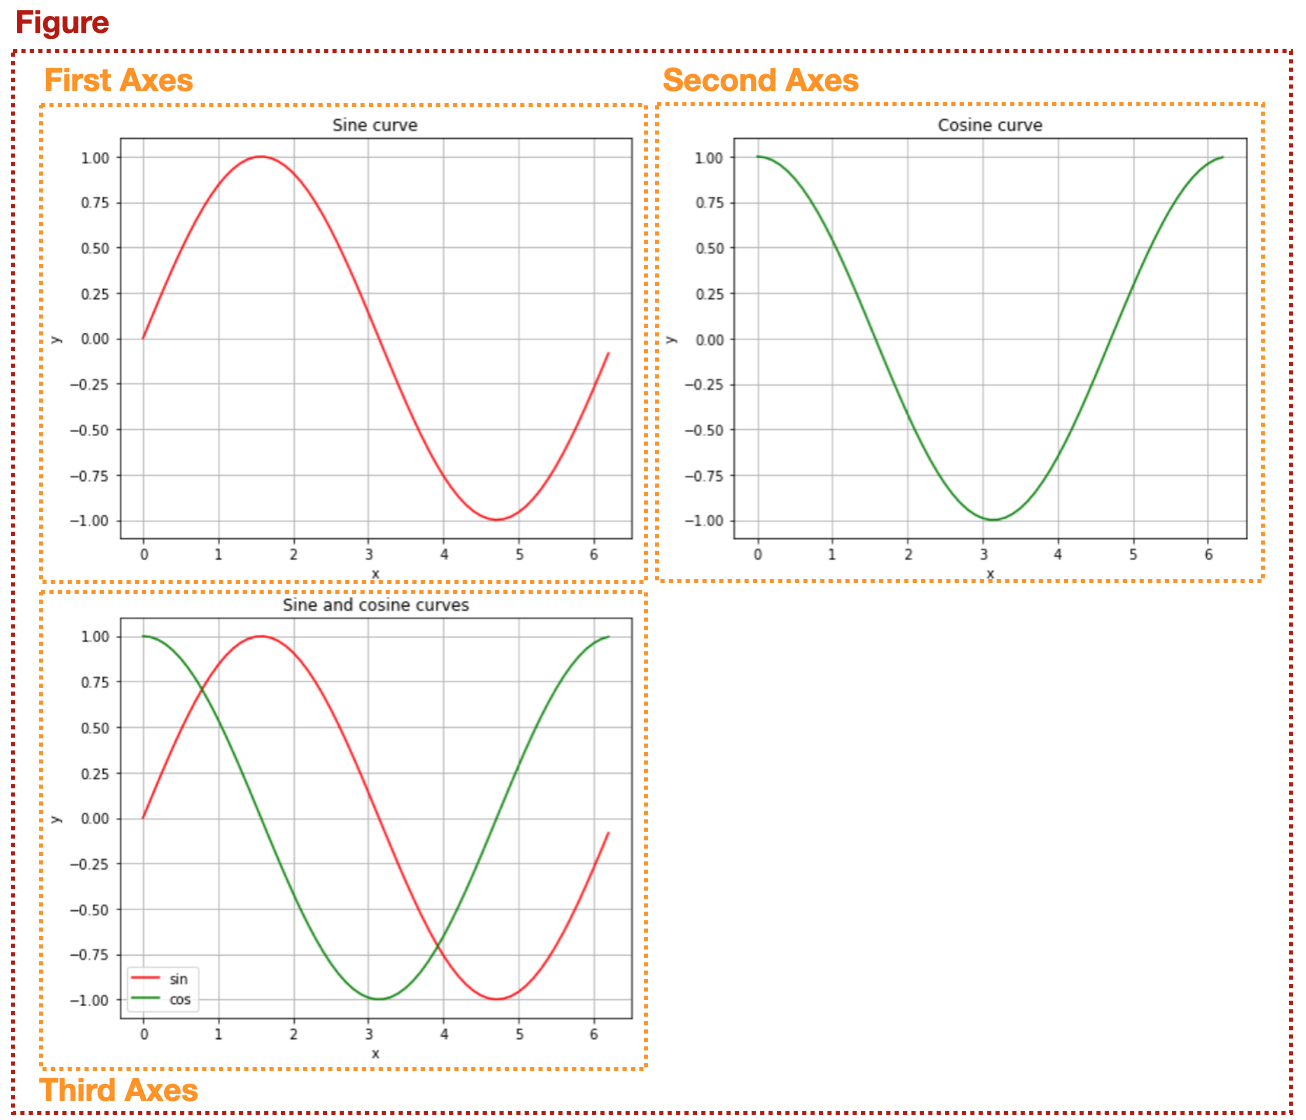

Up until now, we have seen a single figure containing a single Axes. Let us add more Axes to the current figure. To do so there are many approaches available in matplotlib. We will give one of the most well-known approach (among many others) based on the pyplot interface:

### Subplots with the pyplot interface

We can create a figure with subplots with the function **`subplot`** of `pyplot`

```
subplot(nrows, ncols, index, **kwargs)
``` 
Calling this function will automatically (if the figure is not generated yet) create a figure containing `nrows * ncols` grid of Axes where the current Axes will be in the `index`-th position.

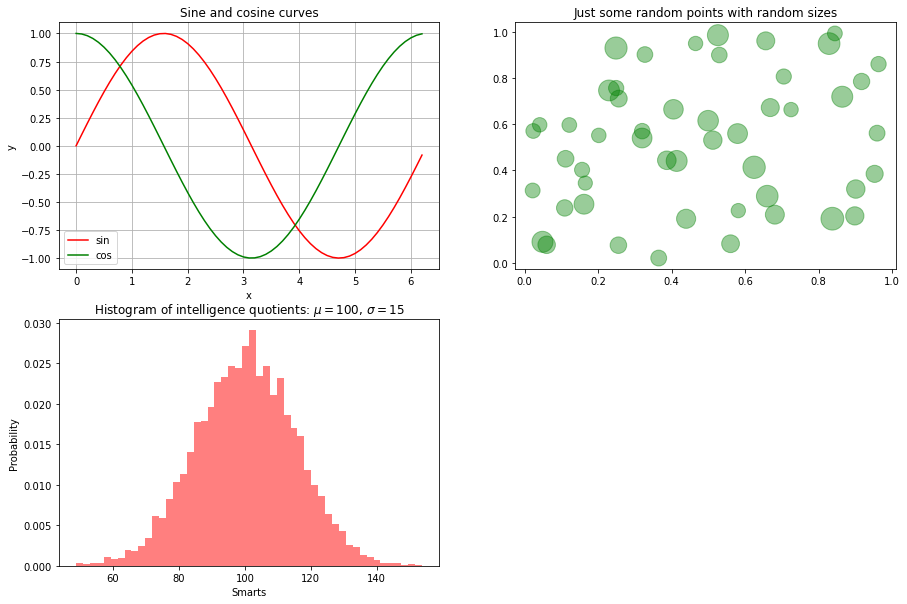

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)           # add an Axes and place the plot in the **first** position of the grid 2x2
plt.plot(x, y1, label="sin", color="red")
plt.plot(x, y2, label="cos", color="green")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves")
plt.legend()

plt.subplot(2, 2, 2)           # add an Axes and place the plot in the **second** position of the grid 2x2
plt.scatter(x_scatter, y_scatter, c="green", alpha=0.4, marker="o", s=size);
plt.title("Just some random points with random sizes")

plt.subplot(2, 2, 3)          # add an Axes and place the plot in the **third** position of the grid 2x2
plt.hist(sample, 50, density=True, facecolor='red', alpha=0.5)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'.
          format(mu=mu, sigma=sigma));

**Important remark:** Thus far we have seen pyplot based approaches for plotting. This approach has the advantage of being quick and easy to generate. However when a plotting becames more complex, it is recommended to use the object-oriented interface.

## 7. Object-oriented interface <a name="7"></a>

Instead of using the submodule `pyplot` we can **create the Figure and the set of Axes** as explicit objects: we call it the object-oriented (OO) approach. This method produces a more robust and customizable way of plotting. Indeed, these (figure and axes) objects are stored and can be used or modified even after their visualization.

A more "cleaner" way to setup your figure will be as follows:

### Plotting a curve

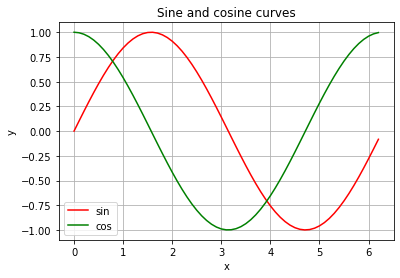

In [21]:
# Toy example 1: with object-oriented interface
fig1, ax1 = plt.subplots()

ax1.plot(x, y1, label="sin", color="red")
ax1.plot(x, y2, label="cos", color="green")
ax1.grid()
ax1.set_xlabel("x")                     # ax1.set_xlabel instead of plt.xlabel
ax1.set_ylabel("y")                     # ax1.set_ylabel instead of plt.ylabel
ax1.set_title("Sine and cosine curves") # ax1.set_title instead of plt.title
ax1.legend();

### Scatter plot

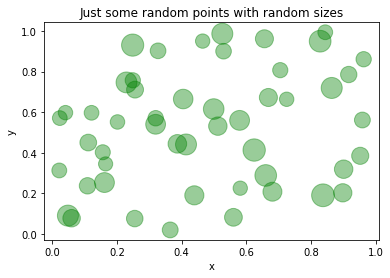

In [22]:
# Toy example 2: with object-oriented interface
fig2, ax2 = plt.subplots()

ax2.scatter(x_scatter, y_scatter, c="green", alpha=0.4, marker="o", s=size);
ax2.set_xlabel("x")                                          # ax2.set_xlabel instead of plt.xlabel
ax2.set_ylabel("y")                                          # ax2.set_ylabel instead of plt.ylabel
ax2.set_title("Just some random points with random sizes");  # ax2.set_title instead of plt.title

### Plotting histograms

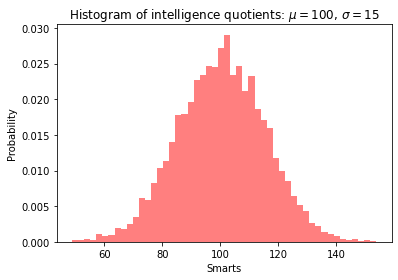

In [23]:
# Toy example 3: with object-oriented interface
fig3, ax3 = plt.subplots()

ax3.hist(sample, 50, density=True, facecolor='red', alpha=0.5)
ax3.set_xlabel('Smarts')                                                           # ax3.set ...
ax3.set_ylabel('Probability')                                                      # ax3.set ...
ax3.set_title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'.
          format(mu=mu, sigma=sigma));

**Important remark:** since it is an object, we can re-visualize it (or even update it) even after the previous cell execution

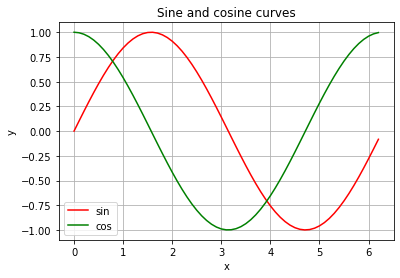

In [24]:
fig1
#fig2
#fig3

### Subplots with the object-oriented approach

We present here two approaches to do subplots:

1. with the function **`subplots`**

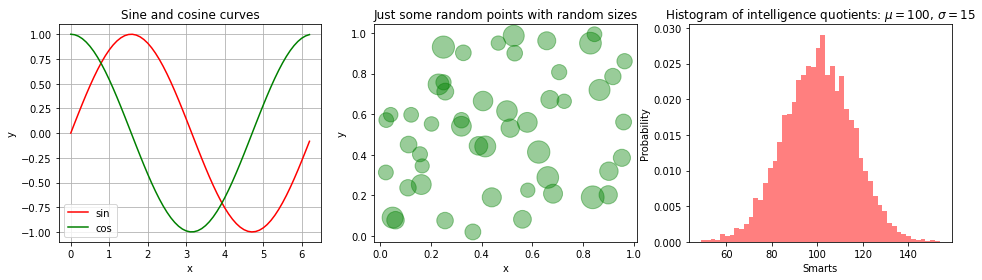

In [25]:
# Unidimensional grid of Axes
fig, ax = plt.subplots(1, 3, figsize=(16, 4)) # a grid of 1x3 of Axes with figsize (16, 4)

ax[0].plot(x, y1, label="sin", color="red")
ax[0].plot(x, y2, label="cos", color="green")
ax[0].grid()
ax[0].set_xlabel("x")                     # ax1.set_xlabel instead of plt.xlabel
ax[0].set_ylabel("y")                     # ax1.set_ylabel instead of plt.ylabel
ax[0].set_title("Sine and cosine curves") # ax1.set_title instead of plt.title
ax[0].legend()

ax[1].scatter(x_scatter, y_scatter, c="green", alpha=0.4, marker="o", s=size);
ax[1].set_xlabel("x")                                          # ax2.set_xlabel instead of plt.xlabel
ax[1].set_ylabel("y")                                          # ax2.set_ylabel instead of plt.ylabel
ax[1].set_title("Just some random points with random sizes")   # ax2.set_title instead of plt.title

ax[2].hist(sample, 50, density=True, facecolor='red', alpha=0.5)
ax[2].set_xlabel('Smarts')                                                           # ax3.set ...
ax[2].set_ylabel('Probability')                                                      # ax3.set ...
ax[2].set_title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'.
          format(mu=mu, sigma=sigma));

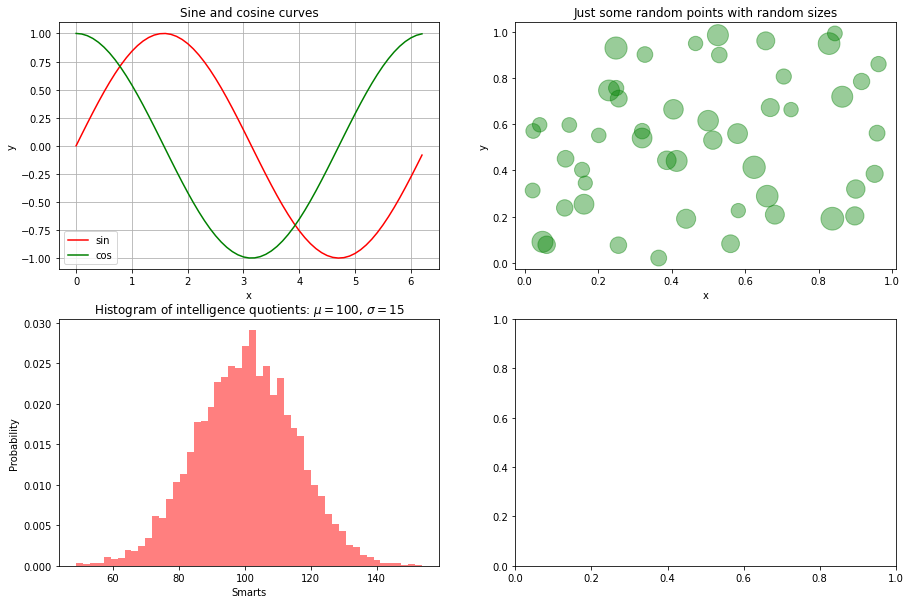

In [26]:
# Bidimensional grid of Axes
fig, ax = plt.subplots(2, 2, figsize=(15, 10)) # a grid of 2x2 of Axes with figsize (15, 10)

ax[0,0].plot(x, y1, label="sin", color="red")
ax[0,0].plot(x, y2, label="cos", color="green")
ax[0,0].grid()
ax[0,0].set_xlabel("x")                     # ax1.set_xlabel instead of plt.xlabel
ax[0,0].set_ylabel("y")                     # ax1.set_ylabel instead of plt.ylabel
ax[0,0].set_title("Sine and cosine curves") # ax1.set_title instead of plt.title
ax[0,0].legend()

ax[0,1].scatter(x_scatter, y_scatter, c="green", alpha=0.4, marker="o", s=size);
ax[0,1].set_xlabel("x")                                          # ax2.set_xlabel instead of plt.xlabel
ax[0,1].set_ylabel("y")                                          # ax2.set_ylabel instead of plt.ylabel
ax[0,1].set_title("Just some random points with random sizes")   # ax2.set_title instead of plt.title

ax[1,0].hist(sample, 50, density=True, facecolor='red', alpha=0.5)
ax[1,0].set_xlabel('Smarts')                                                           # ax3.set ...
ax[1,0].set_ylabel('Probability')                                                      # ax3.set ...
ax[1,0].set_title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'.
          format(mu=mu, sigma=sigma));

2. with the method **`add_subplot`** of `matplotlib.figure`

```
add_subplot(nrows, ncols, index, **kwargs)
```

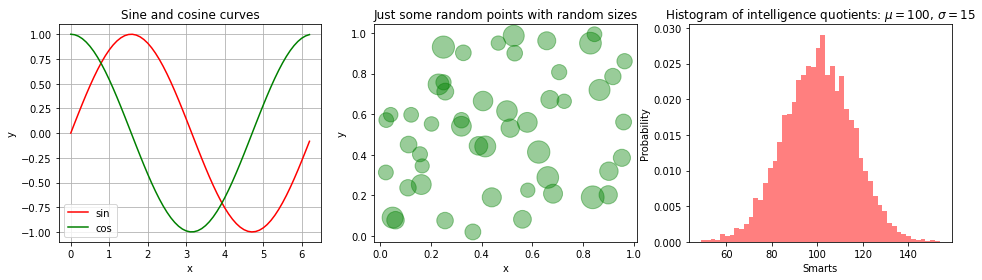

In [27]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(1, 3, 1)  # add an Axes called ax1
ax2 = fig.add_subplot(1, 3, 2)  # add an Axes called ax2
ax3 = fig.add_subplot(1, 3, 3)  # add an Axes called ax3

ax1.plot(x, y1, label="sin", color="red")
ax1.plot(x, y2, label="cos", color="green")
ax1.grid()
ax1.set_xlabel("x")                     # ax1.set_xlabel instead of plt.xlabel
ax1.set_ylabel("y")                     # ax1.set_ylabel instead of plt.ylabel
ax1.set_title("Sine and cosine curves") # ax1.set_title instead of plt.title
ax1.legend()

ax2.scatter(x_scatter, y_scatter, c="green", alpha=0.4, marker="o", s=size);
ax2.set_xlabel("x")                                          # ax2.set_xlabel instead of plt.xlabel
ax2.set_ylabel("y")                                          # ax2.set_ylabel instead of plt.ylabel
ax2.set_title("Just some random points with random sizes")   # ax2.set_title instead of plt.title

ax3.hist(sample, 50, density=True, facecolor='red', alpha=0.5)
ax3.set_xlabel('Smarts')                                                            # ax3.set ...
ax3.set_ylabel('Probability')                                                       # ax3.set ...
ax3.set_title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'. # ax3.set ...
          format(mu=mu, sigma=sigma));

## 8. [optional] Other plots: a quick overview <a name="8"></a>

### Pie plot (or bar chart)

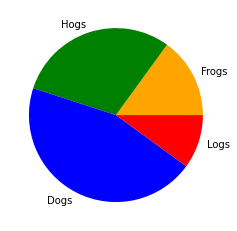

In [28]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['orange', 'green', 'blue', 'red']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors);

### Bar plot

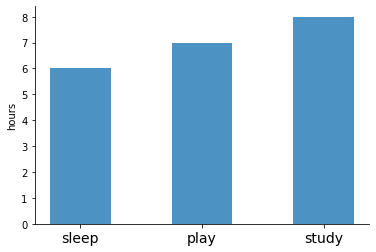

In [29]:
# Some random data
names = ['sleep', 'play', 'study']            # Bar names
height = np.random.randint(1, 10, len(names)) # Bar heights
index = np.arange(len(names))                 # Bar positions

fig, ax = plt.subplots()
ax.bar(index, height, width=0.5, alpha=0.8)
ax.set_ylabel("hours")
ax.set_xticks(index)
ax.set_xticklabels(names, fontsize=14)

# Set nice axes
ax.spines['right'].set_color('none')  # Erase right axis
ax.spines['top'].set_color('none')    # Erase upper axis

### 3D plot

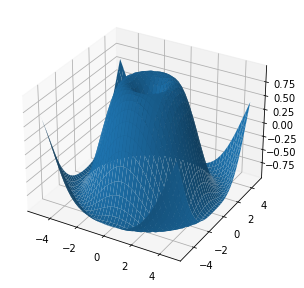

In [30]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Initialize 3D plot
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Plot
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0)

# Exercices <a name="E"></a>

## Exercice 1: line plot

1. In the same Axes, plot the sine curve (in green) and the logarithmic curve (in red) in the interval $(0, 8]$

2. then, in the same figure, color in `steelblue` the area between the sine and the logarithmic curve.

You should have the following graph:

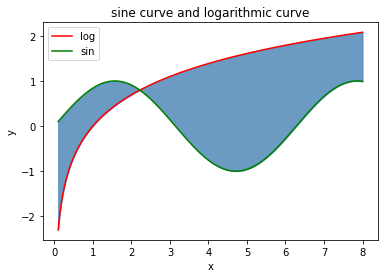

## Exercice 2: scatter plot

The following code plot a circle:

```
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(1.0)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

ax.plot(x1, x2)
ax.set_aspect(1);
```

Generate 500 random points in the space $[-1, 1]\times[-1, 1]$ such that:
- the points inside the circle are colored in green
- and the points outside the circle are colored in red

You should have (approximately) the following figure

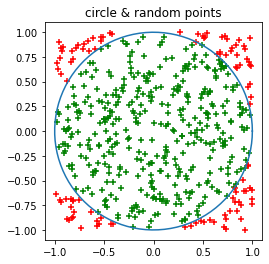

## Exercice 3: subplots

Plot side by side the graphs produced in Exercice 1 and 2.

You should have:

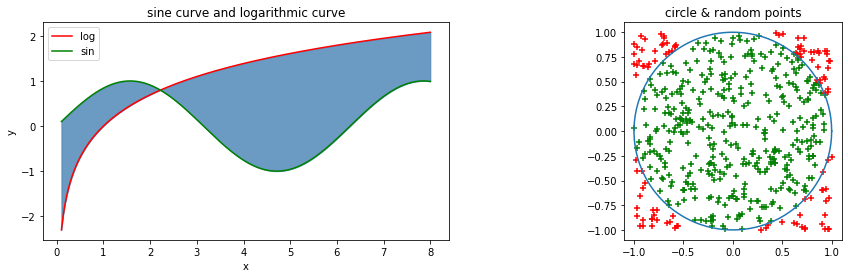